In [ ]:
# Abdülhalim YAYDEMİR

Dosya bilgisi :

P5 pgm formatı
width= 452
height= 460
maxval= 255


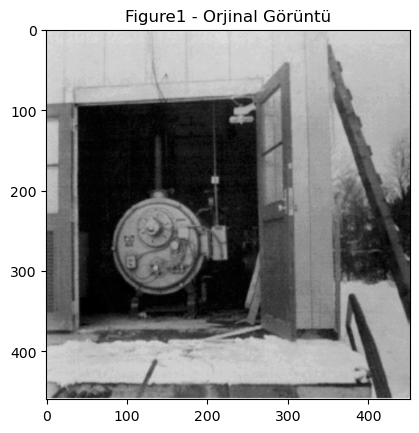

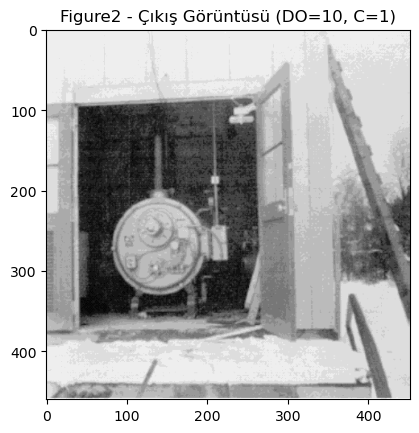

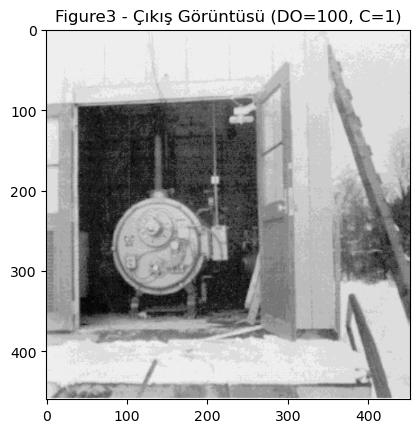

In [1]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli
from scipy import fftpack # fft işlemleri için gerekli

###########################fonksiyonlar###########################



def my2Dfft(f,height,width):
    a=np.arange(width,dtype=complex)
    b=np.arange(height,dtype=complex)
    g=np.arange((height*width),dtype=complex).reshape((height,width))     
    g2=np.arange((height*width),dtype=complex).reshape((height,width))     
            
    for m in range(height):
        for n in range(width):
            a[n]=f[m][n]  # tek boyutta fft için her satır tek boyutlu arrayda saklandı
                
        for v in range(width):
            g[m][v]=np.fft.fft(a,width)[v] # tek boyutta fft alınıp 2 boyutlu bir arrayın satırlarına aktarıldı
            
    for n in range(width):
        for m in range(height):
            b[m]=g[m][n] # fft'si alınmış satırlardan oluşan arrayin sütunları başka bir arraya aktarıldı 
                
        for u in range(height):
            g2[u][n]=(np.fft.fft(b,height)[u]) # tek boyutta fft alınıp 2 boyutlu bir arrayın sütunlarına aktarıldı
                    
    return g2


# Ters fourier alan fonksiyon
def my2Difft(f,height,width):
    f=np.conjugate(f)
    f=my2Dfft(f,height,width)

    return f




def mypgmread(pgm):
    #pgm dosyası 'rb' modunda açılarak okundu.
    with open(pgm, "rb") as fileObject:
        fileContent=fileObject.read()
        
        #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
        print('Dosya bilgisi :\n')
        i=0
        while fileContent[i]!=10:
            if i==0:
                if (fileContent[0]==80) & (fileContent[1]==53):
                    print('P5 pgm formatı')  
                else:
                    print('P5 pgm formatı değil')
            i=i+1

    
        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
        # genişlik yükseklik bilgileri yazdırıldı
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                print("width=",width)
                i=i+1
                string=[]
            
                while fileContent[i]!=10:
                    height=chr(fileContent[i])
                    string.append(height)
                    i=i+1
                    
                string=''.join(string)
                height=int(string)
                print("height=",height)
                     
            
        # maxval değeri yazdırıldı
        i=i+1
        string=[]
        while fileContent[i]!=10:
            maxval=chr(fileContent[i])
            string.append(maxval)       
            i=i+1
    
        string=''.join(string)
        maxval=int(string)
        print("maxval=",maxval)
    

        i=i+1
        f=np.arange(height*width).reshape((height,width))      
        for m in range(height):
            for n in range(width):
                f[m][n]=fileContent[i]
                i=i+1
                
        return f,height,width
    

# logaritma fonksiyonu
def logaritma(f,height,width):
    c=255.0/np.log(np.max(f)+1)
    for m in range(height):
        for n in range(width):
            f[m][n]=math.floor(c*(np.log(float(f[m][n])+1.0)))
    return f




# ters logaritma fonksiyonu
def logaritma_ters(f,height,width):
    c=255.0/np.log(250.0+1.0)
    for m in range(height):
        for n in range(width):
            f[m][n]=math.floor((np.exp(float(f[m][n])/c))-1.0)
    return f



def homomorfik(f,height,width,DO,c):
    H=np.arange((height*width),dtype=complex).reshape((height,width)) 
    
    # homomorfik filtre oluşturuldu
    for m in range(height):
        for n in range(width):
            H[m][n]=(0.5-2.0)*(1.0-np.exp(-c*((m-height/2.0)**2+(n-width/2.0)**2)/(DO**2)))+2.0
            
    # Frekans domeninde çarpım yapıldı
    g=f*H
    # Sonucun ters fourieri alındı
    g=my2Difft(g,height,width)
    #Logaritma işleminin tersi yapıldı
    g=logaritma_ters(np.real(g),height,width)
    return g


####################################################################



# okunacak dosya  Figure Saat Kulesi 1.pgm
pgm="Figure Saat Kulesi 1.pgm"


# dosya içeriği, height ve width bilgileri alındı. 
f,height,width=mypgmread(pgm)  


#orjinal görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure1 - Orjinal Görüntü")
plt.imshow(f,cmap='gray',vmin=0, vmax=255) 
    
    
f=logaritma(f,height,width) # logaritma alındı
f=my2Dfft(f,height,width)/(height*width) # Fourier alındı


# c=1 alındı
c=1

# DO=10 alındı
DO=10

#filtre ile giriş frekans domeninde çarpıldı
g=homomorfik(f,height,width,DO,c)

#Filtrenin çıkışı ekrana yazdırıldı DO=10
plt.figure()
plt.title("Figure2 - Çıkış Görüntüsü (DO=10, C=1)")
plt.imshow(np.real(g)*(height*width),cmap='gray') 



# DO=100 alındı
DO=100

#filtre ile giriş frekans domeninde çarpıldı
g=homomorfik(f,height,width,DO,c)


#Filtrenin çıkışı ekrana yazdırıldı DO=100
plt.figure()
plt.title("Figure3 - Çıkış Görüntüsü (DO=100, C=1)")
plt.imshow(np.real(g)*(height*width),cmap='gray') 



# Sonuç

In [2]:
# Bu bölümde girişe homomorfik filtre uygulanarak çıkış gözlemlendi
# pikseller aydınlatma ve yansıtma olarak iki değerin çarpımından oluşmaktadır.
# buradaki amacımız yansıtma değerlerini gözlemleyebilmektir. 
# çarpım halindeki aydınlatma ve yansıtma verilerini ayrı ele almak için logaritma işlemine tabi tutuyoruz
# sonra homomorfik filtreden geçiriyoruz. Daha sonra ters logaritma alarak görüntüdeki malzemelerin yansıtma ozelliğini 
# belirgin hale getiriyoruz

# filtredeki değişkenler c ve DO 'dır. c=1 seçildi. DO 10 seçildiğinde görünmeyen kısımlardaki malzemeler kısmen belli 
#olmaya başladı.
#DO 100 alındığında görünmeyen kısımlar biraz daha aydınlık hale geldi.